<a href="https://colab.research.google.com/github/ssegovba/identifying-deforestation/blob/main/notebooks/eda_satellite_imageryf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis on Amazon Rainforest Satellite Imagery Data
by *Santiago Segovia*

One of the main issues when trying to build supervised ML models is the lack of labeled data. These are required to train the algorithms to perform the task one aims to solve in previously-unseen data.

This notebook performs an initial check of the data from the [Kaggle challenge Planet: Understanding the Amazon from Space](https://www.kaggle.com/competitions/planet-understanding-the-amazon-from-space). It contains satellite imagery labeled data that will be used for an ML classification model to track deforestation in the Amazon Rainforest.

## I. Initial Set-up

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from google.colab import drive

In [2]:
# Mount GDrive
drive.mount("/content/drive")

Mounted at /content/drive


In [14]:
# Number of train images
! ls "/content/drive/Shareddrives/computer-vision-project/Data/Unzipped/planet/planet/train-jpg" -1 | wc -l

40479


In [15]:
# Number of test images
! ls "/content/drive/Shareddrives/computer-vision-project/Data/Unzipped/planet/planet/test-jpg" -1 | wc -l

40669


## II. The Data

The provided training data comes from imagery of the Amazon basin captured by Planet's Flock 2 satellites between January 1st, 2016, and February 1st, 2017. The images contain the visible red (R) , green (G) , and blue (B) and near-infrared (NIR) bands. The **labels** include several phenomena of interest in the Amazon rainforest basin that are divided into atmospheric conditions, common land cover/use, and rare land cover/use. Each image will have one and potentially more than one atmospheric label and zero or more common or rare labels.

## II.a Labels

We have roughly the same number of images for train/test. We load the file that has the labels of each one of the train images. For this iamges, a single one could be assigned to multiple categories. For instance, `train_1` image is classified as agriculture, clear, primary, and water:

In [18]:
# Load data
data_path = "/content/drive/Shareddrives/computer-vision-project/Data/Unzipped/planet/planet/"
labels_df = pd.read_csv(data_path + "train_classes.csv")

In [19]:
labels_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


We check all the different labels in the dataset and their distribution:

In [20]:
labels = labels_df['tags'].apply(lambda x: x.split(' '))

In [34]:
cnt_labels = {}
for item in labels:
  for label in item:
    cnt_labels[label] = cnt_labels.get(label, 0) + 1

In [52]:
num_labels = pd.DataFrame.from_dict(cnt_labels,  orient='index').reset_index(). \
  rename(columns={"index": "label", 0: "count"}).sort_values('count', ascending=False)

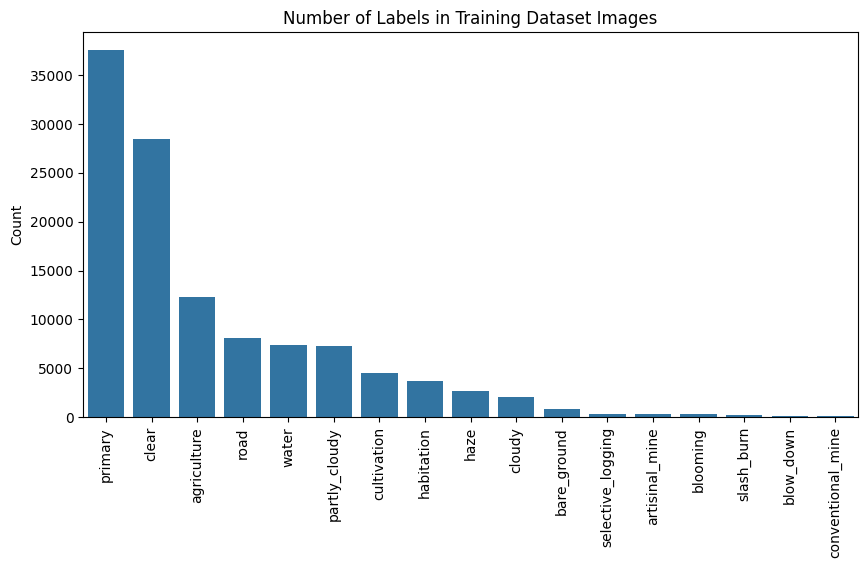

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(num_labels, x="label", y="count")

plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Number of Labels in Training Dataset Images")
plt.show()

As we can see from the plot, the vast majority of images have `primary` tags and `clear`.